In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [3]:
#Load Dataset
df = pd.read_csv(r"C:\Users\PRASAD P\Desktop\Credit_scoring_Project\credit_data.csv")

print(df.head())
print(df.shape)
print(df.info())

   person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
0    PERSONAL          D      35000          16.02            1   
1   EDUCATION          B       1000          11.14            0   
2     MEDICAL          C       5500          12.87            1   
3     MEDICAL          C      35000          15.23            1   
4     MEDICAL          C      35000          14.27            1   

   loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
0                 0.59                         Y                           3  


In [5]:
#filling Missing values
df['person_emp_length'].fillna(df['person_emp_length'].median(), inplace=True)
df['loan_int_rate'].fillna(df['loan_int_rate'].median(), inplace=True)

In [6]:
#Handle missing values
print(df.isnull().sum())

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64


In [8]:
#Converting Categorical columns
le = LabelEncoder()

for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])
   

In [9]:
 print(df.dtypes)

person_age                      int64
person_income                   int64
person_home_ownership           int64
person_emp_length             float64
loan_intent                     int64
loan_grade                      int64
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file       int64
cb_person_cred_hist_length      int64
dtype: object


In [10]:
#Defining X and Y values
X = df.drop("loan_status", axis=1)
y = df["loan_status"]

In [12]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training size:", X_train.shape)
print("Testing size:", X_test.shape)

Training size: (26064, 11)
Testing size: (6517, 11)


In [14]:
#Feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train[:5])

[[ 5.66851795 -0.31717677  0.92404561 -0.68213538  0.84992295  0.6746644
  -0.76018887  0.02663141 -0.65843875  2.17447733  4.48497655]
 [-0.27606233 -0.63165151  0.22625263 -1.17543958 -1.45948223  2.39492002
  -0.17434095  1.77173414  1.49131123 -0.45988063 -0.69475502]
 [-0.7453713  -0.23855808 -1.16933334 -0.43548328  0.84992295  0.6746644
   1.01318862  0.68430072  1.30437645  2.17447733 -0.69475502]
 [-0.90180763 -0.1598765  -1.16933334  0.30447301  0.27257166 -1.04559122
  -0.57018414 -1.01847675 -0.56497136 -0.45988063 -0.44810114]
 [-0.58893498  0.20170655  0.92404561 -0.43548328  0.84992295  0.6746644
  -0.41184686  0.49872077 -0.75190614 -0.45988063 -0.69475502]]


In [16]:
#Train Model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(y_pred[:10])

[1 0 0 0 1 0 0 0 0 0]


In [17]:
#Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8371950283872948
Confusion Matrix:
 [[4820  252]
 [ 809  636]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.95      0.90      5072
           1       0.72      0.44      0.55      1445

    accuracy                           0.84      6517
   macro avg       0.79      0.70      0.72      6517
weighted avg       0.83      0.84      0.82      6517



In [18]:
#Confusion Matrix-LogisticRegression
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest Accuracy: 0.927880926806813


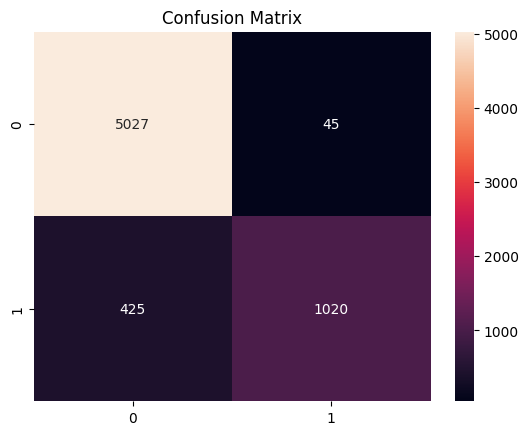

In [19]:
#Confusion Matrix Plot
sns.heatmap(confusion_matrix(y_test, y_pred_rf),
            annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.show()